# Read Data

In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Volatility

In [2]:
start = datetime(2017, 1, 1)
end = datetime(2022, 11, 7)

ticker = web.DataReader('^IXIC', 'yahoo', start=start, end=end)

returns = 100 * ticker.Close.pct_change().dropna()

Text(0.5, 1.0, 'Returns')

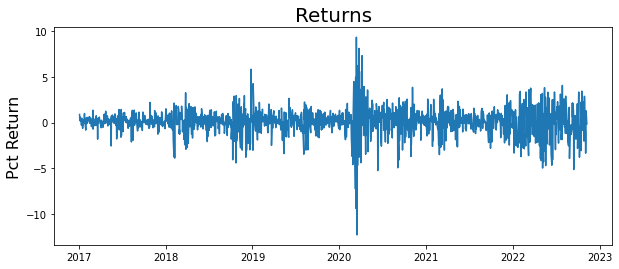

In [3]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Returns', fontsize=20)

# ACF

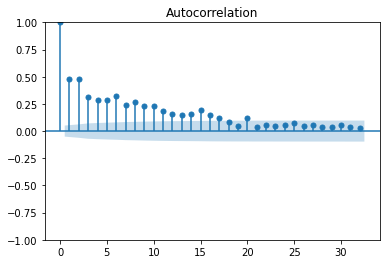

In [4]:
plot_acf(returns**2)
plt.show()

# PACF

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


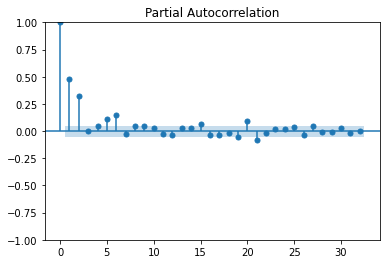

In [5]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,6)

In [6]:
model = arch_model(returns, p=2, q=6)

model_fit = model.fit()

model_fit.summary()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 30711.55868552213
Iteration:      2,   Func. Count:     26,   Neg. LLF: 822889.1307966781
Iteration:      3,   Func. Count:     38,   Neg. LLF: 2643.8913295860243
Iteration:      4,   Func. Count:     51,   Neg. LLF: 2413.619659655097
Iteration:      5,   Func. Count:     63,   Neg. LLF: 3677.8927117603907
Iteration:      6,   Func. Count:     75,   Neg. LLF: 2979.3117881114913
Iteration:      7,   Func. Count:     87,   Neg. LLF: 2686.4418869632927
Iteration:      8,   Func. Count:    100,   Neg. LLF: 2306.0947168770513
Iteration:      9,   Func. Count:    111,   Neg. LLF: 2307.550546316334
Iteration:     10,   Func. Count:    124,   Neg. LLF: 2477.1407339087677
Iteration:     11,   Func. Count:    136,   Neg. LLF: 2316.2350033528246
Iteration:     12,   Func. Count:    148,   Neg. LLF: 2303.2976276637814
Iteration:     13,   Func. Count:    160,   Neg. LLF: 2301.6653630052447
Iteration:     14,   Func. Count:    171,   Neg. LLF: 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2301.24
Distribution:                  Normal   AIC:                           4622.48
Method:            Maximum Likelihood   BIC:                           4675.43
                                        No. Observations:                 1472
Date:                Mon, Nov 07 2022   Df Residuals:                     1471
Time:                        20:25:03   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1037  2.778e-02      3.734  1.887e-04 [4.927e-02,  0.158]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0834  2.897e-02      2.877  4.013e-03 [2.657e-02,  0.140]
alpha[1]       0.1207      0.137      0.884      0.377   [ -0.147,  0.389]
alpha[2]       0.2013  4.009e-02      5.021  5.140e-07   [  0.123,  0.280]
beta[1]    2.7879e-14      1.331  2.095e-14      1.000   [ -2.608,  2.608]
beta[2]        0.6352      1.679      0.378      0.705   [ -2.656,  3.926]
beta[3]    1.8913e-14      1.000  1.892e-14      1.000   [ -1.959,  1.959]
beta[4]    7.3940e-14      2.119  3.489e-14      1.000   [ -4.154,  4.154]
beta[5]        0.0165      0.374  4.427e-02      0.965   [ -0.716,  0.749]
beta[6]        0.0000      0.688      0.000      1.000   [ -1.349,  1.349]
==========================================================================

Covariance estimator: robust
"""

# Try GARCH(2,2)

In [7]:
model = arch_model(returns, p=2, q=2)

model_fit = model.fit()

model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 8934.791017406156
Iteration:      2,   Func. Count:     20,   Neg. LLF: 7747711785.585894
Iteration:      3,   Func. Count:     30,   Neg. LLF: 3021.2940529057314
Iteration:      4,   Func. Count:     38,   Neg. LLF: 3184.9731589646954
Iteration:      5,   Func. Count:     48,   Neg. LLF: 2455.67885771312
Iteration:      6,   Func. Count:     57,   Neg. LLF: 2301.5017450904734
Iteration:      7,   Func. Count:     64,   Neg. LLF: 2306.745372968541
Iteration:      8,   Func. Count:     72,   Neg. LLF: 2301.3726135229845
Iteration:      9,   Func. Count:     79,   Neg. LLF: 2301.3163351950825
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2301.293234087432
Iteration:     11,   Func. Count:     93,   Neg. LLF: 2301.291058009446
Iteration:     12,   Func. Count:    100,   Neg. LLF: 2301.290985253754
Iteration:     13,   Func. Count:    107,   Neg. LLF: 2301.2909742771253
Iteration:     14,   Func. Count:    114,   Neg. LLF: 2301.

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2301.29
Distribution:                  Normal   AIC:                           4614.58
Method:            Maximum Likelihood   BIC:                           4646.35
                                        No. Observations:                 1472
Date:                Mon, Nov 07 2022   Df Residuals:                     1471
Time:                        20:25:03   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1038  2.733e-02      3.799  1.454e-04 [5.026e-02,  0.157]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0832  2.619e-02      3.176  1.494e-03 [3.185e-02,  0.135]
alpha[1]       0.1186  3.990e-02      2.973  2.945e-03 [4.044e-02,  0.197]
alpha[2]       0.1989  4.381e-02      4.540  5.618e-06   [  0.113,  0.285]
beta[1]        0.0169  7.359e-02      0.230      0.818   [ -0.127,  0.161]
beta[2]        0.6392  7.672e-02      8.332  7.981e-17   [  0.489,  0.790]
==========================================================================

Covariance estimator: robust
"""

In [8]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

In [9]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

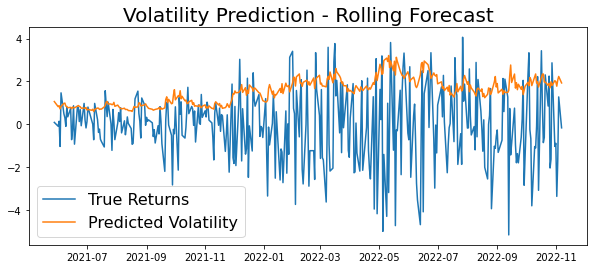

In [10]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [14]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [15]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

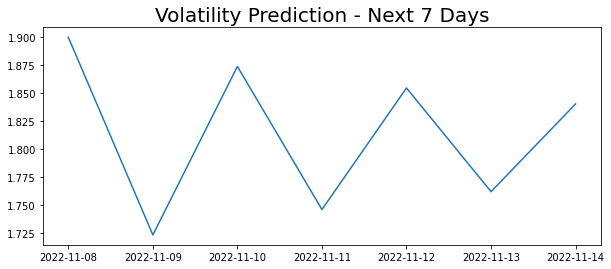

In [16]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)